In [11]:
from sklearn.feature_extraction.text import CountVectorizer
import nltk.data
from nltk.corpus import stopwords
import string
from nltk.corpus import wordnet as wn
from nltk import pos_tag
import networkx
import matplotlib.pyplot as plt
import scipy
import numpy
from sklearn.decomposition import NMF
from itertools import chain
import re

In [12]:
# Set of all unique words in Alice in Wonderland / corpus
from itertools import chain
import re

def unique_words(lines):
    return set(chain(*(line.split() for line in lines if line)))

fp = open("alicepars.txt", "r")
text = fp.read()
print(text)

words = re.findall('\w+', text.lower())
powerset = set(words)

powerlist = list(powerset)
print(len(powerlist))#2549
print(powerlist)

ALICE'S ADVENTURES IN WONDERLAND

Lewis Carroll

THE MILLENNIUM FULCRUM EDITION 3.0




CHAPTER I. Down the Rabbit-Hole

Alice was beginning to get very tired of sitting by her sister on the
bank, and of having nothing to do: once or twice she had peeped into the
book her sister was reading, but it had no pictures or conversations in
it, 'and what is the use of a book,' thought Alice 'without pictures or
conversations?'

So she was considering in her own mind (as well as she could, for the
hot day made her feel very sleepy and stupid), whether the pleasure
of making a daisy-chain would be worth the trouble of getting up and
picking the daisies, when suddenly a White Rabbit with pink eyes ran
close by her.

There was nothing so VERY remarkable in that; nor did Alice think it so
VERY much out of the way to hear the Rabbit say to itself, 'Oh dear!
Oh dear! I shall be late!' (when she thought it over afterwards, it
occurred to her that she ought to have wondered at this, but at the time
it

In [13]:
# Open a parsed version of corpus and split by paragraphs
fp = open("alicepars.txt", "r")
text = fp.read()

paragraphs = text.split("\n\n")

corpus = {}
wordcounts = {}
i = 0

# Creates a dict for every paragraph in the following format
# FORMAT: {X: (text, {WORD: count}, [unique_words])}
for para in paragraphs:
    if(len(para) > 1) and '*' not in para:
        para_wordcount = {}
        words = para.split(" ")
        words = [x.strip(string.punctuation).rstrip() for x in words]
        for word in words:
            word = word.lower()
            if word not in para_wordcount:
                para_wordcount[word] = 1
            else:
                para_wordcount[word] += 1
        corpus.update({i : para_wordcount})
        words = re.findall('\w+', para.lower())
        uniq_words = set(words)
        uniq_words = list(uniq_words)
        corpus.update({i : (para, para_wordcount, uniq_words)})
        i = i + 1

# print(len(corpus))
# print(corpus)
chapter_index = []
for i in range(len(corpus)):
    if "\nchapter" in corpus[i][1]:
        chapter_index.append(i)
print(chapter_index)

#Split corpus into chapters
chapters = []
chap1 = {}
chapters.append(chap1)
chap2 = {}
chapters.append(chap2)
chap3 = {}
chapters.append(chap3)
chap4 = {}
chapters.append(chap4)
chap5 = {}
chapters.append(chap5)
chap6 = {}
chapters.append(chap6)
chap7 = {}
chapters.append(chap7)
chap8 = {}
chapters.append(chap8)
chap9 = {}
chapters.append(chap9)
chap10 = {}
chapters.append(chap10)
chap11 = {}
chapters.append(chap11)
chap12 = {}
chapters.append(chap12)


for k in range(0,11):
    j = 0
    for i in range(chapter_index[k], chapter_index[k+1]):
        chapters[k].update({j : corpus[i]})
        j = j + 1

[3, 28, 55, 104, 147, 223, 305, 411, 483, 576, 662, 737]


In [14]:
#Generates the wordcounts for each paragraph in corpus
# Result: map Format: {X: {Word: count}}
# import re
# wordcounts = {}
# i=0

# for para in paragraphs:
#     para_wordcount = {}
#     words = para.split(" ")
#     words = [x.strip(string.punctuation).rstrip() for x in words]
#     for word in words:
#         if word not in para_wordcount:
#             para_wordcount[word] = 1
#         else:
#             para_wordcount[word] += 1
#     corpus.update({i : para_wordcount})
#     words = re.findall('\w+', para.lower())
#     uniq_words = set(words)
#     uniq_words = list(uniq_words)
#     if(len(uniq_words) > 1):
#         wordcounts.update({i : (para_wordcount, uniq_words)})
#         i = i + 1

# print(len(wordcounts))
# print(wordcounts)

In [15]:
# Height of matrix / number of "documents"
def generateMatrix(corpus):
    len(corpus)
    # Length of matrix / number of unique words
    len(powerlist)

    # Matrix for co occurrence matrix
    matrix = numpy.zeros((len(corpus), len(powerlist)))
    matrix.shape
    return matrix

In [16]:
# Document-term matrix for topic modeling
def generateDTM(matrix, corpus):
    for i in range(len(corpus)):
        uniqs = corpus[i][2]
        for j in range(len(uniqs)):
            if uniqs[j] in powerlist:
                index = powerlist.index(uniqs[j])
                try:
                    matrix[i][index] = corpus[i][1][uniqs[j]]           
                except:
                    matrix[i][index] = 0
            else:
                matrix[i][index] = 0
    
    return matrix
            

In [17]:
print(generateMatrix(chap1))
matrix2 = generateMatrix(chap1)
print(generateDTM(matrix2, chap1))
matrix3 = generateDTM(matrix2, chap1)
# print(powerlist.index("the"))
# print(corpus[646][1])
# print(matrix[646][744])

[[ 0.  0.  0. ...,  0.  0.  0.]
 [ 0.  0.  0. ...,  0.  0.  0.]
 [ 0.  0.  0. ...,  0.  0.  0.]
 ..., 
 [ 0.  0.  0. ...,  0.  0.  0.]
 [ 0.  0.  0. ...,  0.  0.  0.]
 [ 0.  0.  0. ...,  0.  0.  0.]]
[[ 0.  0.  0. ...,  0.  0.  0.]
 [ 0.  0.  0. ...,  0.  0.  0.]
 [ 0.  0.  0. ...,  0.  0.  0.]
 ..., 
 [ 0.  0.  0. ...,  0.  0.  0.]
 [ 0.  0.  0. ...,  0.  0.  0.]
 [ 0.  0.  0. ...,  0.  0.  0.]]


In [18]:
# Non negative matrix factorization!
def nnmf(matrix):
    X = numpy.array(matrix)
#     print(X)
    model = NMF(n_components = 10, init='random', random_state=0)
    W = model.fit_transform(X)
#     print("W:", W)
    H = model.components_
#     print("H:", H)
    return(model, W, H)

nnmf(matrix3)

(NMF(alpha=0.0, beta_loss='frobenius', init='random', l1_ratio=0.0,
   max_iter=200, n_components=10, random_state=0, shuffle=False,
   solver='cd', tol=0.0001, verbose=0),
 array([[  0.00000000e+00,   6.14433845e-03,   5.39226395e-03,
           3.20509915e-02,   0.00000000e+00,   7.58206465e-03,
           0.00000000e+00,   0.00000000e+00,   3.16718026e-03,
           0.00000000e+00],
        [  5.37084438e-02,   0.00000000e+00,   5.19709787e-02,
           0.00000000e+00,   7.78839311e-03,   0.00000000e+00,
           8.11982603e-02,   1.91716440e-01,   7.67909158e-03,
           1.79350386e-02],
        [  0.00000000e+00,   6.41478718e-02,   1.41757842e-03,
           1.92431799e-03,   0.00000000e+00,   1.17943050e-01,
           1.24050832e-03,   5.70506062e-01,   8.15248106e-03,
           0.00000000e+00],
        [  1.34240801e-01,   1.19517355e+00,   0.00000000e+00,
           0.00000000e+00,   0.00000000e+00,   3.60680810e-02,
           1.09570095e-01,   5.29799218e-01,   0.0

In [19]:
# Entity detection
entities = []

stop_words = set(stopwords.words('english'))
stop_words.update(['.', ',', '"', "'", '?', '!', ':', ';', '(', ')', '[', ']', '{', '}'])

for para in paragraphs:
    words = para.split(" ")
    
    for word in words [1:]:
        word = "".join((char for char in word if char not in string.punctuation))
        if word.lower() not in stop_words:
            if word.istitle():
                if word not in entities and word.lower() in powerlist:
                    token = nltk.word_tokenize(word)
                    tagged = pos_tag(token)
                    if (tagged[0][1] == 'NN' or tagged[0][1] == 'VBG') and len(word) > 2 or word =="Knave":
                        entities.append(word)

entities.append("Cook")
entities.append("Two")
entities.append("Five")
entities.append("Seven")

# EntityList is master entity list
entityList = ["Alice", "Cheshire", "Hatter", "Queen", "Rabbit", "King", "Duchess", "Caterpillar",
             "Hare", "Dormouse", "Gryphon", "Turtle", "Knave", "Mouse", "Dodo", "Duck", "Lory", "Eaglet",
             "Cook", "Pigeon", "Two", "Five", "Seven", "Bill", "Footman"]
for entity in entities:
    if entity not in entityList:
        if entity == "Dinah" or entity == "Ada" or entity == "Mabel" or entity == "Edwin" or entity == "Morcar" or entity == "Serpent" or entity == "Ann" or entity == "Elise" or entity == "Lacie" or entity == "Tillie" or entity == "Tortoise" or entity == "Lobster" or entity == "Owl" or entity == "Panther":
            entityList.append(entity)
entityList = [x.lower() for x in entityList]
print(entityList)

['alice', 'cheshire', 'hatter', 'queen', 'rabbit', 'king', 'duchess', 'caterpillar', 'hare', 'dormouse', 'gryphon', 'turtle', 'knave', 'mouse', 'dodo', 'duck', 'lory', 'eaglet', 'cook', 'pigeon', 'two', 'five', 'seven', 'bill', 'footman', 'dinah', 'ada', 'mabel', 'edwin', 'morcar', 'ann', 'serpent', 'lacie', 'tillie', 'tortoise', 'lobster', 'owl', 'panther']


In [20]:
def createEntityMatrix(corpus):
    entity_matrix = numpy.zeros((len(corpus), len(entityList)))
    entity_matrix.shape
    for i in range(len(corpus)):
        uniqs = corpus[i][2]
        for j in range(len(uniqs)):
            if uniqs[j] in entityList:
                index = entityList.index(uniqs[j])
                try:
                    entity_matrix[i][index] = corpus[i][1][uniqs[j]]           
                except:
                    entity_matrix[i][index] = 0
    return entity_matrix

In [21]:
entity_matrix = createEntityMatrix(corpus)
print(entity_matrix)
# print(entity_matrix.shape)
# print(entityList.index("hatter"))
# print(corpus[339][1])
# print(entity_matrix[339][2])

# print(chap1_entities)
# print(chap1_entities.shape)
# print(entityList.index("alice"))
# print(chap1_entities[1][0])

[[ 0.  0.  0. ...,  0.  0.  0.]
 [ 0.  0.  0. ...,  0.  0.  0.]
 [ 0.  0.  0. ...,  0.  0.  0.]
 ..., 
 [ 1.  0.  0. ...,  0.  0.  0.]
 [ 0.  0.  0. ...,  0.  0.  0.]
 [ 0.  0.  0. ...,  0.  0.  0.]]


In [22]:
# print(entity_matrix[806])
# print(len(entity_matrix[806]))
def getInteractions(matrix):
    adj = numpy.zeros((len(entity_matrix[806]), len(entity_matrix[806])))
    interactions = []
    i = 0
    for item in entity_matrix[806]:
        if int(item) > 0:
            print(entityList[i])
            interactions.append(entityList[i])
        i = i + 1
    print(interactions)
    return interactions

getInteractions(entity_matrix)

rabbit
hare
gryphon
mouse
['rabbit', 'hare', 'gryphon', 'mouse']


['rabbit', 'hare', 'gryphon', 'mouse']

In [44]:
print(entityList)

['alice', 'cheshire', 'hatter', 'queen', 'rabbit', 'king', 'duchess', 'caterpillar', 'hare', 'dormouse', 'gryphon', 'turtle', 'knave', 'mouse', 'dodo', 'duck', 'lory', 'eaglet', 'cook', 'pigeon', 'two', 'five', 'seven', 'bill', 'footman', 'dinah', 'ada', 'mabel', 'edwin', 'morcar', 'ann', 'serpent', 'lacie', 'tillie', 'tortoise', 'lobster', 'owl', 'panther']


In [45]:
print(corpus[806])

("The long grass rustled at her feet as the White Rabbit hurried by--the\nfrightened Mouse splashed his way through the neighbouring pool--she\ncould hear the rattle of the teacups as the March Hare and his friends\nshared their never-ending meal, and the shrill voice of the Queen\nordering off her unfortunate guests to execution--once more the pig-baby\nwas sneezing on the Duchess's knee, while plates and dishes crashed\naround it--once more the shriek of the Gryphon, the squeaking of the\nLizard's slate-pencil, and the choking of the suppressed guinea-pigs,\nfilled the air, mixed up with the distant sobs of the miserable Mock\nTurtle.", {'the': 18, 'long': 1, 'grass': 1, 'rustled': 1, 'at': 1, 'her': 2, 'feet': 1, 'as': 2, 'white': 1, 'rabbit': 1, 'hurried': 1, 'by--the\nfrightened': 1, 'mouse': 1, 'splashed': 1, 'his': 2, 'way': 1, 'through': 1, 'neighbouring': 1, 'pool--she\ncould': 1, 'hear': 1, 'rattle': 1, 'of': 6, 'teacups': 1, 'march': 1, 'hare': 1, 'and': 4, 'friends\nshared'

In [23]:
def generateEntityAdj(matrix):
    X = scipy.sparse.csr_matrix(entity_matrix) 
    print(X.shape)
    Xc = X.T * X
    Xc.setdiag(0)
    print(Xc.shape)
    print(Xc.todense())
    return Xc.todense()

adj_mtx = generateEntityAdj(entity_matrix)

(808, 38)
(38, 38)
[[ 0.  2.  4. ...,  0.  0.  0.]
 [ 2.  0.  0. ...,  0.  0.  0.]
 [ 4.  0.  0. ...,  0.  0.  0.]
 ..., 
 [ 0.  0.  0. ...,  0.  0.  0.]
 [ 0.  0.  0. ...,  0.  0.  5.]
 [ 0.  0.  0. ...,  0.  5.  0.]]


38
{0: 'alice', 1: 'cheshire', 2: 'hatter', 3: 'queen', 4: 'rabbit', 5: 'king', 6: 'duchess', 7: 'caterpillar', 8: 'hare', 9: 'dormouse', 10: 'gryphon', 11: 'turtle', 12: 'knave', 13: 'mouse', 14: 'dodo', 15: 'duck', 16: 'lory', 17: 'eaglet', 18: 'cook', 19: 'pigeon', 20: 'two', 21: 'five', 22: 'seven', 23: 'bill', 24: 'footman', 25: 'dinah', 26: 'ada', 27: 'mabel', 28: 'edwin', 29: 'morcar', 30: 'ann', 31: 'serpent', 32: 'lacie', 33: 'tillie', 34: 'tortoise', 35: 'lobster', 36: 'owl', 37: 'panther'}
(808, 38)
(38, 38)
[[ 0.  2.  4. ...,  0.  0.  0.]
 [ 2.  0.  0. ...,  0.  0.  0.]
 [ 4.  0.  0. ...,  0.  0.  0.]
 ..., 
 [ 0.  0.  0. ...,  0.  0.  0.]
 [ 0.  0.  0. ...,  0.  0.  5.]
 [ 0.  0.  0. ...,  0.  5.  0.]]


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/networkx/drawing/nx_pylab.py:126: MatplotlibDeprecationWarning: pyplot.hold is deprecated.
    Future behavior will be consistent with the long-time default:
    plot commands add elements without first clearing the
    Axes and/or Figure.
  b = plt.ishold()
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/networkx/drawing/nx_pylab.py:138: MatplotlibDeprecationWarning: pyplot.hold is deprecated.
    Future behavior will be consistent with the long-time default:
    plot commands add elements without first clearing the
    Axes and/or Figure.
  plt.hold(b)
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/matplotlib/__init__.py:917: UserWarning: axes.hold is deprecated. Please remove it from your matplotlibrc and/or style files.
  warnings.warn(self.msg_depr_set % key)
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/matplotl

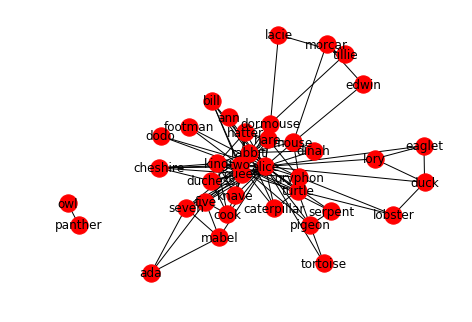

In [24]:
def drawNetworkxgraph(matrix):
    labels = {}
    print(len(entityList))
    for i in range(0,len(entityList)):
        labels.update({i : entityList[i]})

    print(labels)
    adj_mtx = generateEntityAdj(matrix)
    G=networkx.from_numpy_matrix(adj_mtx)
    networkx.draw(G, labels=labels, with_labels=True)
    plt.show()
    return G

G1 = drawNetworkxgraph(entity_matrix)


In [25]:
centrality = networkx.degree_centrality(G1)
centralities = []
for i in range(0, len(centrality)):
    centralities.append((entityList[i], centrality[i]))

In [26]:
from operator import itemgetter
sorted(centralities,key=itemgetter(1))

[('owl', 0.02702702702702703),
 ('panther', 0.02702702702702703),
 ('dodo', 0.05405405405405406),
 ('footman', 0.05405405405405406),
 ('edwin', 0.05405405405405406),
 ('morcar', 0.05405405405405406),
 ('ann', 0.05405405405405406),
 ('lacie', 0.05405405405405406),
 ('tillie', 0.05405405405405406),
 ('tortoise', 0.05405405405405406),
 ('lory', 0.08108108108108109),
 ('eaglet', 0.08108108108108109),
 ('pigeon', 0.08108108108108109),
 ('dinah', 0.08108108108108109),
 ('ada', 0.08108108108108109),
 ('serpent', 0.08108108108108109),
 ('lobster', 0.08108108108108109),
 ('caterpillar', 0.10810810810810811),
 ('duck', 0.10810810810810811),
 ('bill', 0.10810810810810811),
 ('mabel', 0.10810810810810811),
 ('cheshire', 0.13513513513513514),
 ('knave', 0.13513513513513514),
 ('cook', 0.13513513513513514),
 ('hatter', 0.16216216216216217),
 ('duchess', 0.16216216216216217),
 ('seven', 0.16216216216216217),
 ('dormouse', 0.1891891891891892),
 ('gryphon', 0.1891891891891892),
 ('mouse', 0.18918918918

In [27]:
from networkx.readwrite import json_graph
import json
for node in G1.nodes():
    if int(G1.degree(node)) < 0:
        G1.remove_node(node)

G1.nodes()
i = 0
labels = {}
for i in range(0,len(entityList)):
    labels.update({i : entityList[i]})


networkx.set_node_attributes(G1, 'name', labels)
print(networkx.get_node_attributes(G1,'name'))

d = json_graph.node_link_data(G1)
json.dump(d, open('force/force.json', 'w'))

{0: 'alice', 1: 'cheshire', 2: 'hatter', 3: 'queen', 4: 'rabbit', 5: 'king', 6: 'duchess', 7: 'caterpillar', 8: 'hare', 9: 'dormouse', 10: 'gryphon', 11: 'turtle', 12: 'knave', 13: 'mouse', 14: 'dodo', 15: 'duck', 16: 'lory', 17: 'eaglet', 18: 'cook', 19: 'pigeon', 20: 'two', 21: 'five', 22: 'seven', 23: 'bill', 24: 'footman', 25: 'dinah', 26: 'ada', 27: 'mabel', 28: 'edwin', 29: 'morcar', 30: 'ann', 31: 'serpent', 32: 'lacie', 33: 'tillie', 34: 'tortoise', 35: 'lobster', 36: 'owl', 37: 'panther'}


In [28]:
%%HTML
<iframe height=400px width=100% src='force/force.html'></iframe>

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/networkx/drawing/nx_pylab.py:126: MatplotlibDeprecationWarning: pyplot.hold is deprecated.
    Future behavior will be consistent with the long-time default:
    plot commands add elements without first clearing the
    Axes and/or Figure.
  b = plt.ishold()
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/networkx/drawing/nx_pylab.py:138: MatplotlibDeprecationWarning: pyplot.hold is deprecated.
    Future behavior will be consistent with the long-time default:
    plot commands add elements without first clearing the
    Axes and/or Figure.
  plt.hold(b)
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/matplotlib/__init__.py:917: UserWarning: axes.hold is deprecated. Please remove it from your matplotlibrc and/or style files.
  warnings.warn(self.msg_depr_set % key)
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/matplotl

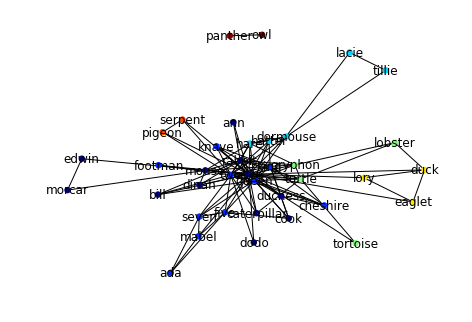

In [75]:
import networkx as nx
import community
import matplotlib.pyplot as plt

nx.transitivity(G1)

#find modularity
part = community.best_partition(G1)
mod = community.modularity(part,G1)

#plot, color nodes using community structure
values = [part.get(node) for node in G1.nodes()]
nx.draw_spring(G1, cmap = plt.get_cmap('jet'), node_color = values, node_size=30, labels = labels, with_labels=True)
plt.show()


7


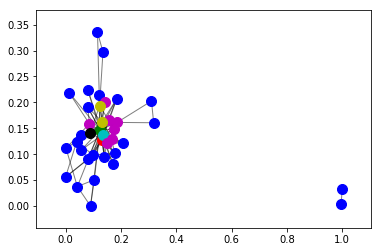

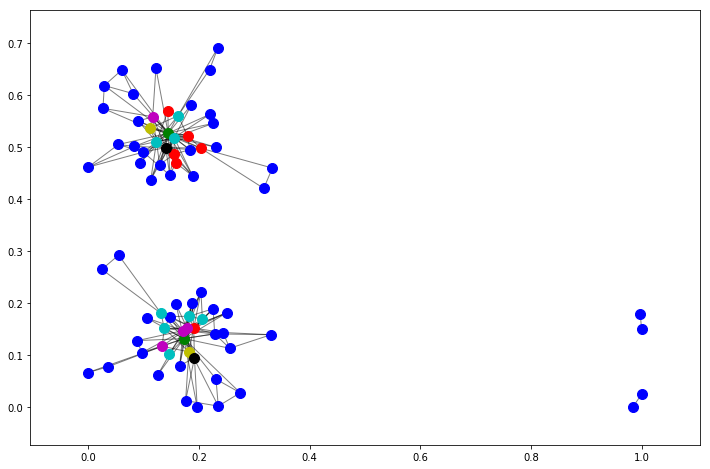

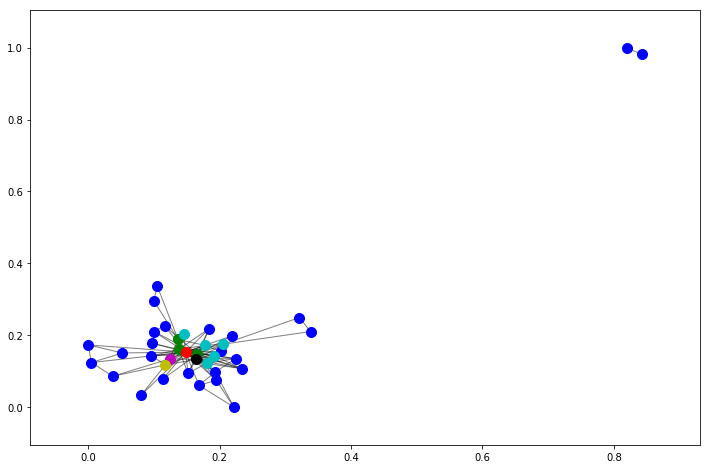

In [103]:
import matplotlib.pyplot
from sklearn.cluster import KMeans

k = len(set(part.values()))
print(k)
kmeans = KMeans(k)
kmeans.fit(adj_mtx)
colors = 'bgrcmykw'
pos = nx.spring_layout(G1, k=0.05)


for i in range(k):
    list_nodes = numpy.where(kmeans.labels_ == i)[0].tolist()
    networkx.draw_networkx_nodes(G1, pos, list_nodes, node_size=100, node_color =colors[i],labels=labels, with_labels=True)

networkx.draw_networkx_edges(G1,pos, alpha=0.5)
fig = plt.figure(figsize=(12,8))
plt.show()

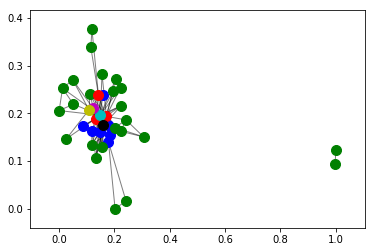

In [107]:
from sklearn.cluster import AgglomerativeClustering

single_linkage = AgglomerativeClustering(n_clusters = k, linkage="ward")
single_linkage.fit(adj_mtx)

colors = 'bgrcmykw'
pos = nx.spring_layout(G1, k=0.05)

for i in range(k):
    list_nodes = numpy.where(single_linkage.labels_ == i)[0].tolist()
    networkx.draw_networkx_nodes(G1, pos, list_nodes, node_size=100, node_color =colors[i],labels=labels, with_labels=True)

networkx.draw_networkx_edges(G1,pos, alpha=0.5)
fig = plt.figure(figsize=(12,8))
plt.show()

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/manifold/spectral_embedding_.py:234: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn("Graph is not fully connected, spectral embedding"


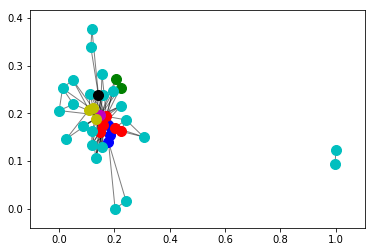

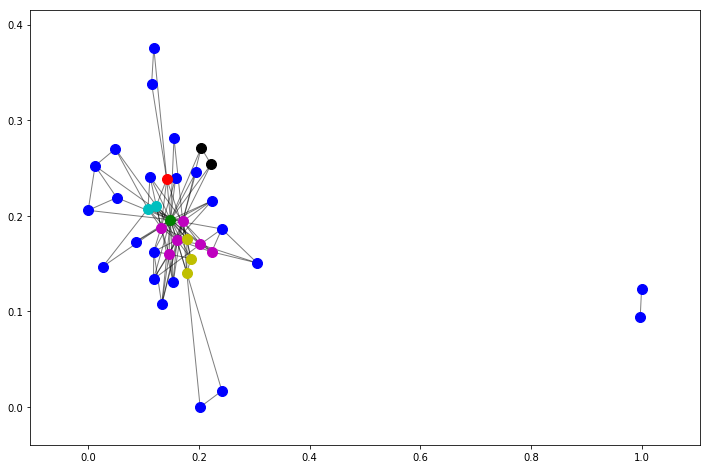

In [109]:
from sklearn.cluster import SpectralClustering

spectral = SpectralClustering(n_clusters = k, affinity="precomputed", n_init=200)
spectral.fit(adj_mtx)

for i in range(k):
    list_nodes = numpy.where(spectral.labels_ == i)[0].tolist()
    networkx.draw_networkx_nodes(G1, pos, list_nodes, node_size=100, node_color =colors[i],labels=labels, with_labels=True)

networkx.draw_networkx_edges(G1,pos, alpha=0.5)
fig = plt.figure(figsize=(12,8))
plt.show()

In [62]:
import os
directory = os.fsencode("/Users/edwinv/Dropbox/txt_data_bypage")

mujahideenmonthlytext = ""
corpus = {}
wordcounts = {}
i = 0
files = 0

for file in os.listdir(directory):
    filename = os.fsdecode(file)
    if "mujahideenmonthly" in filename:
        files = files + 1
        fp = open("/Users/edwinv/Dropbox/txt_data_bypage/" + filename, "r")
        text = fp.read()
        doc_wordcount = {}
        words = text.split(" ")
        words = [x.strip(string.punctuation).rstrip() for x in words]
        for word in words:
            word = word.lower()
            if word not in doc_wordcount:
                doc_wordcount[word] = 1
            else:
                doc_wordcount[word] += 1
        corpus.update({i : doc_wordcount})
        words = re.findall('\w+', text.lower())
        uniq_words = set(words)
        uniq_words = list(uniq_words)
        corpus.update({i : (text, doc_wordcount, uniq_words)})
        i = i + 1
        mujahideenmonthlytext = mujahideenmonthlytext + text
        
mujahideenwords = re.findall('\w+', mujahideenmonthlytext.lower())
mujahideenpowerset = set(mujahideenwords)

mujahideenpowerlist = list(mujahideenpowerset)

In [64]:
entities = []
for file in os.listdir(directory):
    filename = os.fsdecode(file)
    if "mujahideenmonthly" in filename:
        files = files + 1
        fp = open("/Users/edwinv/Dropbox/txt_data_bypage/" + filename, "r")
        text = fp.read()
        words = text.split(" ")
        for word in words:
            word = "".join((char for char in word if char not in string.punctuation))
            if word.lower() not in stop_words:
                if word.istitle():
                    if word not in entities and word.lower() in mujahideenpowerlist:
                        token = nltk.word_tokenize(word)
                        tagged = pos_tag(token)
                        if (tagged[0][1] == 'NN' or tagged[0][1] == 'VBG') and len(word) > 2 or word =="Knave":
                            entities.append(word)
        

In [30]:
print(len(mujahideenpowerlist)) #16057

16057


In [38]:
matrix = generateMatrix(corpus)

In [39]:
print(len(matrix))

397


In [59]:
# Document-term matrix for topic modeling
def generateDTM(matrix, corpus):
    for i in range(len(corpus)):
        uniqs = corpus[i][2]
        for j in range(len(uniqs)):
            if uniqs[j] in mujahideenpowerlist and not '_':
                index = mujahideenpowerlist.index(uniqs[j])
                print(index)
                try:
                    matrix[i][index] = corpus[i][1][uniqs[j]]           
                except:
                    matrix[i][index] = 0
#             else:
#                 index = mujahideenpowerlist.index(uniqs[j])
#                 matrix[i][index] = 0
    
    return matrix
            

In [60]:
generateDTM(matrix, corpus)

array([[ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       ..., 
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.]])

In [61]:
nnmf(matrix)

(NMF(alpha=0.0, beta_loss='frobenius', init='random', l1_ratio=0.0,
   max_iter=200, n_components=10, random_state=0, shuffle=False,
   solver='cd', tol=0.0001, verbose=0),
 array([[ 0.,  0.,  0., ...,  0.,  0.,  0.],
        [ 0.,  0.,  0., ...,  0.,  0.,  0.],
        [ 0.,  0.,  0., ...,  0.,  0.,  0.],
        ..., 
        [ 0.,  0.,  0., ...,  0.,  0.,  0.],
        [ 0.,  0.,  0., ...,  0.,  0.,  0.],
        [ 0.,  0.,  0., ...,  0.,  0.,  0.]]),
 array([[ 0.,  0.,  0., ...,  0.,  0.,  0.],
        [ 0.,  0.,  0., ...,  0.,  0.,  0.],
        [ 0.,  0.,  0., ...,  0.,  0.,  0.],
        ..., 
        [ 0.,  0.,  0., ...,  0.,  0.,  0.],
        [ 0.,  0.,  0., ...,  0.,  0.,  0.],
        [ 0.,  0.,  0., ...,  0.,  0.,  0.]]))

In [67]:
entityList = [x.lower() for x in entities]
print(entityList)

['quran', 'state', 'gulbudin', 'hekmatyar', 'amir', 'mujahsdeen', 'qadeer', 'gul', 'mujahideen', 'statement', 'visit', 'hamidullah', 'headache', 'army', 'base', 'jaji', 'chawpi', 'editorial', 'box', 'nothing', 'pakistan', 'iran', 'article', 'charter', 'glory', 'drank', 'hath', 'allah', 'truth', 'grace', 'amin', 'babrak', 'guidance', 'religion', 'government', 'alhamdulillah', 'islam', 'asia', 'delhi', 'world', 'surah', 'baqara', 'goliath', 'opr', 'lord', 'power', 'hikmatyar', 'muslim', 'engineer', 'council', 'unity', 'islami', 'communication', 'cultura', 'education', 'sovief', 'history', 'page', 'perez', 'organization', 'itehadi', 'delegation', 'spokesman', 'beneficient', 'indiscriminate', 'hindukush', 'small', 'declaration', 'afghnistarf', 'surviving', 'qarghee', 'laghman', 'hafizullah', 'isla', 'parcham', 'yugoslavia', 'radio', 'tashkent', 'saur', 'almighty', 'zahir', 'shah', 'dauod', 'tarakai', 'sadiq', 'agha', 'far', 'east', 'inshallah', 'nazi', 'disregarding', 'muja', 'order', 'con

In [78]:
entity_matrix = createEntityMatrix(corpus)

In [84]:
print(entity_matrix[1])

[ 1.  2.  1. ...,  0.  0.  0.]


In [88]:
def generateEntityAdj(matrix):
    X = scipy.sparse.csr_matrix(entity_matrix) 
    print(X.shape)
    Xc = X.T * X
    Xc.setdiag(0)
    print(Xc.shape)
    print(Xc.todense())
    return Xc.todense()

adj_mtx = generateEntityAdj(entity_matrix)

(397, 2084)
(2084, 2084)
[[  0.   9.   4. ...,   0.   0.   1.]
 [  9.   0.  11. ...,   2.   1.   1.]
 [  4.  11.   0. ...,   0.   0.   1.]
 ..., 
 [  0.   2.   0. ...,   0.   2.   2.]
 [  0.   1.   0. ...,   2.   0.   1.]
 [  1.   1.   1. ...,   2.   1.   0.]]


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/scipy/sparse/compressed.py:730: SparseEfficiencyWarning: Changing the sparsity structure of a csc_matrix is expensive. lil_matrix is more efficient.
  SparseEfficiencyWarning)


2084
{0: 'quran', 1: 'state', 2: 'gulbudin', 3: 'hekmatyar', 4: 'amir', 5: 'mujahsdeen', 6: 'qadeer', 7: 'gul', 8: 'mujahideen', 9: 'statement', 10: 'visit', 11: 'hamidullah', 12: 'headache', 13: 'army', 14: 'base', 15: 'jaji', 16: 'chawpi', 17: 'editorial', 18: 'box', 19: 'nothing', 20: 'pakistan', 21: 'iran', 22: 'article', 23: 'charter', 24: 'glory', 25: 'drank', 26: 'hath', 27: 'allah', 28: 'truth', 29: 'grace', 30: 'amin', 31: 'babrak', 32: 'guidance', 33: 'religion', 34: 'government', 35: 'alhamdulillah', 36: 'islam', 37: 'asia', 38: 'delhi', 39: 'world', 40: 'surah', 41: 'baqara', 42: 'goliath', 43: 'opr', 44: 'lord', 45: 'power', 46: 'hikmatyar', 47: 'muslim', 48: 'engineer', 49: 'council', 50: 'unity', 51: 'islami', 52: 'communication', 53: 'cultura', 54: 'education', 55: 'sovief', 56: 'history', 57: 'page', 58: 'perez', 59: 'organization', 60: 'itehadi', 61: 'delegation', 62: 'spokesman', 63: 'beneficient', 64: 'indiscriminate', 65: 'hindukush', 66: 'small', 67: 'declaration'

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/scipy/sparse/compressed.py:730: SparseEfficiencyWarning: Changing the sparsity structure of a csc_matrix is expensive. lil_matrix is more efficient.
  SparseEfficiencyWarning)
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/networkx/drawing/nx_pylab.py:126: MatplotlibDeprecationWarning: pyplot.hold is deprecated.
    Future behavior will be consistent with the long-time default:
    plot commands add elements without first clearing the
    Axes and/or Figure.
  b = plt.ishold()
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/networkx/drawing/nx_pylab.py:138: MatplotlibDeprecationWarning: pyplot.hold is deprecated.
    Future behavior will be consistent with the long-time default:
    plot commands add elements without first clearing the
    Axes and/or Figure.
  plt.hold(b)
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages

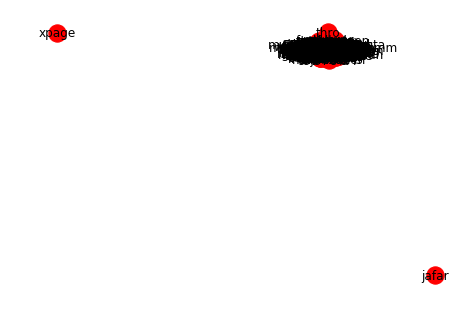

In [89]:
G1 = drawNetworkxgraph(entity_matrix)


In [90]:
centrality = networkx.degree_centrality(G1)
centralities = []
for i in range(0, len(centrality)):
    centralities.append((entityList[i], centrality[i]))

In [91]:
from operator import itemgetter
sorted(centralities,key=itemgetter(1))

[('jafar', 0.0),
 ('xpage', 0.0),
 ('thro', 0.0009601536245799327),
 ('shurah', 0.002400384061449832),
 ('mujchideen', 0.002880460873739798),
 ('fascism', 0.002880460873739798),
 ('pshawar', 0.0033605376860297645),
 ('mujahsdeen', 0.003840614498319731),
 ('celebration', 0.0043206913106096975),
 ('agiz', 0.0043206913106096975),
 ('barnyan', 0.0043206913106096975),
 ('mfirch', 0.0043206913106096975),
 ('gut', 0.0043206913106096975),
 ('mon', 0.0043206913106096975),
 ('chardara', 0.004800768122899664),
 ('chawpi', 0.00528084493518963),
 ('qarghizis', 0.00528084493518963),
 ('azarbaijanis', 0.00528084493518963),
 ('polit', 0.00528084493518963),
 ('discouraging', 0.00528084493518963),
 ('aludin', 0.005760921747479596),
 ('shamsul', 0.005760921747479596),
 ('ikramudin', 0.005760921747479596),
 ('marouf', 0.005760921747479596),
 ('attaghar', 0.005760921747479596),
 ('rahmani', 0.0062409985597695625),
 ('naqib', 0.0062409985597695625),
 ('aisha', 0.0062409985597695625),
 ('szzv', 0.00672107537

In [92]:
from networkx.readwrite import json_graph
import json
for node in G1.nodes():
    if int(G1.degree(node)) < 0:
        G1.remove_node(node)

G1.nodes()
i = 0
labels = {}
for i in range(0,len(entityList)):
    labels.update({i : entityList[i]})


networkx.set_node_attributes(G1, 'name', labels)
print(networkx.get_node_attributes(G1,'name'))

d = json_graph.node_link_data(G1)
json.dump(d, open('force/force.json', 'w'))

{0: 'quran', 1: 'state', 2: 'gulbudin', 3: 'hekmatyar', 4: 'amir', 5: 'mujahsdeen', 6: 'qadeer', 7: 'gul', 8: 'mujahideen', 9: 'statement', 10: 'visit', 11: 'hamidullah', 12: 'headache', 13: 'army', 14: 'base', 15: 'jaji', 16: 'chawpi', 17: 'editorial', 18: 'box', 19: 'nothing', 20: 'pakistan', 21: 'iran', 22: 'article', 23: 'charter', 24: 'glory', 25: 'drank', 26: 'hath', 27: 'allah', 28: 'truth', 29: 'grace', 30: 'amin', 31: 'babrak', 32: 'guidance', 33: 'religion', 34: 'government', 35: 'alhamdulillah', 36: 'islam', 37: 'asia', 38: 'delhi', 39: 'world', 40: 'surah', 41: 'baqara', 42: 'goliath', 43: 'opr', 44: 'lord', 45: 'power', 46: 'hikmatyar', 47: 'muslim', 48: 'engineer', 49: 'council', 50: 'unity', 51: 'islami', 52: 'communication', 53: 'cultura', 54: 'education', 55: 'sovief', 56: 'history', 57: 'page', 58: 'perez', 59: 'organization', 60: 'itehadi', 61: 'delegation', 62: 'spokesman', 63: 'beneficient', 64: 'indiscriminate', 65: 'hindukush', 66: 'small', 67: 'declaration', 68:

In [93]:
%%HTML
<iframe height=400px width=100% src='force/force.html'></iframe>